# Lavoro sulla bibliografia

## Funzioni base

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
from pybtex.database.input import bibtex

In [2]:
# a partire dal file .bib, crea e restituisce il pd.DataFrame
def extractPdDf(bibfile: str) -> pd.DataFrame:
    """
    Read .bib file and return a pd.DataFrame 
    :param bibfile: string, name of the needed file (e.g., biblio.bib)
    :return: pd.DataFrame obtained from the given file
    """
    parser = bibtex.Parser()
    bibdata = parser.parse_file(bibfile)
    bibkeys = bibdata.entries.keys() #
    print(bibkeys) #
    bibarray = []
    
    for bib_id in bibdata.entries:
        
        b = bibdata.entries[bib_id].fields
        title = b["title"] # titolo sempre presente
        year = b["year"] if b.get("year") else 'NA'
        url = b["url"] if b.get("url") else 'NA'
        abstract = b["abstract"] if b.get("abstract") else 'NA'
        journal = b["journal"] if b.get("journal") else 'NA'
        volume = b["volume"] if b.get("volume") else 'NA'
        pages = b["pages"] if b.get("pages") else 'NA'
        doi= b["doi"] if b.get("doi") else 'NA'
        pmid = b["pmid"] if b.get("pmid") else 'NA'
        arxivid = b["arxivid"] if b.get("arxivid") else 'NA'
        booktitle = b["booktitle"] if b.get("booktitle") else 'NA'
        publisher = b["publisher"] if b.get("publisher") else 'NA'
        
        values = {
            'cite' : bib_id,  # importante
            'Title' : title, 
            'Year' : year,
            'Url': url,
            'Abstract': abstract,
            'Journal' : journal,
            'Volume': volume,
            'Pages': pages,
            'Doi': doi,
            'Pmid': pmid,
            'Arxivid': arxivid,
            'Book Title' : booktitle,
            'Publisher': publisher
        }
        
        bibarray.append(values)

    return pd.DataFrame(bibarray)

In [3]:
# creare il pd.DataFrame in due casi: se ci sono tanti .bib da concatenare oppure se è uno solo da aprire.
def createDf(path: str, nfiles=True, filename='') -> pd.DataFrame:
    """
    Read one or more .bib file and return a pd.DataFrame 
    :param path: string, path of the needed file
    :param nfiles: bool, True if many files, False if one file
    :param filename: string with the name of the file (if only one (i.e., nfiles=False, else param not used)
    :return: pd.DataFrame obtained from the given file
    """
    if nfiles:
        try:
            titles = [file for file in os.listdir(path) if file.endswith(".bib")]
            frames = [extractPdDf(path + el) for el in titles]
            return pd.concat(frames)
        except:
            return None # no bib files in folder
    else:
        try:
            return extractPdDf(path+filename)
        except:
            return None # given filename not found

In [4]:
path = "C:\\Users\\alice\\Desktop\\Ricerca\\paper2\\"
filename = 'biblio.bib'
df = createDf(path, False, filename)
print(df)

KeysView(OrderedCaseInsensitiveDict([('von_neumann_first_1993', Entry('article',
  fields=[
    ('title', 'First draft of a report on the {EDVAC}'), 
    ('volume', '15'), 
    ('issn', '1058-6180'), 
    ('url', 'http://ieeexplore.ieee.org/document/238389/'), 
    ('doi', '10.1109/85.238389'), 
    ('number', '4'), 
    ('urldate', '2023-02-16'), 
    ('journal', 'IEEE Annals of the History of Computing'), 
    ('year', '1993'), 
    ('pages', '27--75')],
  persons=OrderedCaseInsensitiveDict([('author', [Person('von Neumann, J.')])]))), ('talati2020mmpu', Entry('article',
  fields=[
    ('title', 'mmpu—a real processing-in-memory architecture to combat the von neumann bottleneck'), 
    ('journal', 'Applications of Emerging Memory Technology: Beyond Storage'), 
    ('pages', '191--213'), 
    ('year', '2020'), 
    ('publisher', 'Springer')],
  persons=OrderedCaseInsensitiveDict([('author', [Person('Talati, Nishil'), Person('Ben-Hur, Rotem'), Person('Wald, Nimrod'), Person('Haj-Ali, A

In [5]:
"""import string

parser = bibtex.Parser()
bibdata = parser.parse_file(filename)
bibkeys = bibdata.entries.keys()
bibarray = []
authors = ""
translator = str.maketrans('', '', string.punctuation)
for bib_id in bibdata.entries:
    for author in bibdata.entries[bib_id].persons["author"]:
        new_author = str(author.first()) + " " + str(author.last()) 
        new_author = new_author.translate(translator)
        if len(authors) == 0:
            authors = '"' + new_author
        else:
            authors = authors + ", " + new_author
        print(authors)
        authors = ""

print()
for bib_id in bibdata.entries:
    print([autore for autore in bibdata.entries[bib_id].persons["author"]])
    '''for i in bibdata.entries[bib_id].persons["author"]:
        print(i, end=' -- ')
    print('\n\n')'''"""

'import string\n\nparser = bibtex.Parser()\nbibdata = parser.parse_file(filename)\nbibkeys = bibdata.entries.keys()\nbibarray = []\nauthors = ""\ntranslator = str.maketrans(\'\', \'\', string.punctuation)\nfor bib_id in bibdata.entries:\n    for author in bibdata.entries[bib_id].persons["author"]:\n        new_author = str(author.first()) + " " + str(author.last()) \n        new_author = new_author.translate(translator)\n        if len(authors) == 0:\n            authors = \'"\' + new_author\n        else:\n            authors = authors + ", " + new_author\n        print(authors)\n        authors = ""\n\nprint()\nfor bib_id in bibdata.entries:\n    print([autore for autore in bibdata.entries[bib_id].persons["author"]])\n    \'\'\'for i in bibdata.entries[bib_id].persons["author"]:\n        print(i, end=\' -- \')\n    print(\'\n\n\')\'\'\''

**Attenzione**: controllare se la creazione del *pd.DataFrame* è andata a buon fine utilizzando `print(df)`. Se qualcosa è andato storto, `df` sarà `None` (e tutta la parte qui sotto non funzionerà)

## Grafici

### Divisione degli articoli

#### Divisione 1

2 gruppi: "tra 1900 e 1999", "dal 2000"

In [6]:
# articoli del 1900
y1900s = df[df['Year'] < '2000'].dropna()
# print(y1900s.index.size)

# articoli del 2000
y2000s = df[df['Year'] >= '2000'].dropna()
# print(y2000s.index.size)

In [8]:
y1900s

,cite,Title,Year,Url,Abstract,Journal,Volume,Pages,Doi,Pmid,Arxivid,Book Title,Publisher
0,von_neumann_first_1993,First draft of a report on the {EDVAC},1993,http://ieeexplore.ieee.org/document/238389/,NA,IEEE Annals of the History of Computing,15,27--75,10.1109/85.238389,NA,NA,NA,NA
21,backus_can_1978,Can programming be liberated from the von {Neu...,1978,https://dl.acm.org/doi/10.1145/359576.359579,NA,Communications of the ACM,21,613--641,10.1145/359576.359579,NA,NA,NA,NA
23,kahle1989connection,The connection machine model cm-1 architecture,1989,NA,NA,"IEEE transactions on systems, man, and cyberne...",19,707--713,NA,NA,NA,NA,IEEE
24,pearson_liii_1901,{LIII}. \textit{{On} lines and planes of close...,1901,https://www.tandfonline.com/doi/full/10.1080/1...,NA,"The London, Edinburgh, and Dublin Philosophica...",2,559--572,10.1080/14786440109462720,NA,NA,NA,NA
25,kramer_nonlinear_1991,Nonlinear principal component analysis using a...,1991,https://onlinelibrary.wiley.com/doi/10.1002/ai...,NA,AIChE Journal,37,233--243,10.1002/aic.690370209,NA,NA,NA,NA
26,CNN,A Shift-Invariant Neural Network for the Lung ...,1998,NA,NA,VLSI Signal Processing,18,241-250,10.1023/A:1007937214367,NA,NA,NA,NA
28,LSTM,Long {Short}-{Term} {Memory},1997,https://direct.mit.edu/neco/article/9/8/1735-1...,Learning to store information over extended ti...,Neural Computation,9,1735--1780,10.1162/neco.1997.9.8.1735,NA,NA,NA,NA
30,hammer_adaptive_1962,Adaptive {Control} {Processes}: {A} {Guided} {...,1962,http://epubs.siam.org/doi/10.1137/1004050,NA,SIAM Review,4,163--163,10.1137/1004050,NA,NA,NA,NA
34,Jones1994,Natural Language Processing: A Historical Review,1994,NA,NA,NA,NA,3--16,NA,NA,NA,Current Issues in Computational Linguistics: I...,Springer Netherlands
35,Schank75,Conceptual Dependency Theory,1975,NA,NA,NA,NA,22-82,NA,NA,NA,Conceptual Information Processing,North-Holland and Elsevier


In [9]:
y1900s_peranno = y1900s.sort_values(by='Year')
y1900s_peranno

,cite,Title,Year,Url,Abstract,Journal,Volume,Pages,Doi,Pmid,Arxivid,Book Title,Publisher
24,pearson_liii_1901,{LIII}. \textit{{On} lines and planes of close...,1901,https://www.tandfonline.com/doi/full/10.1080/1...,NA,"The London, Edinburgh, and Dublin Philosophica...",2,559--572,10.1080/14786440109462720,NA,NA,NA,NA
78,turing_computable_1937,"On {Computable} {Numbers}, with an {Applicatio...",1937,http://doi.wiley.com/10.1112/plms/s2-42.1.230,NA,Proceedings of the London Mathematical Society,s2-42,230--265,10.1112/plms/s2-42.1.230,NA,NA,NA,NA
61,harvardarchitecture,A Logical Calculus of Ideas Immanent in Nervou...,1943,NA,NA,The Bulletin of Mathematical Biophysics,5,115-133,NA,NA,NA,NA,Springer
62,rosenblatt1960perceptron,Perceptron simulation experiments,1960,NA,NA,Proceedings of the IRE,48,301--309,NA,NA,NA,NA,IEEE
30,hammer_adaptive_1962,Adaptive {Control} {Processes}: {A} {Guided} {...,1962,http://epubs.siam.org/doi/10.1137/1004050,NA,SIAM Review,4,163--163,10.1137/1004050,NA,NA,NA,NA
35,Schank75,Conceptual Dependency Theory,1975,NA,NA,NA,NA,22-82,NA,NA,NA,Conceptual Information Processing,North-Holland and Elsevier
21,backus_can_1978,Can programming be liberated from the von {Neu...,1978,https://dl.acm.org/doi/10.1145/359576.359579,NA,Communications of the ACM,21,613--641,10.1145/359576.359579,NA,NA,NA,NA
74,kohonen1982self,Self-organized formation of topologically corr...,1982,NA,NA,NA,43,59--69,NA,NA,NA,Biological cybernetics,NA
75,hopfield1982neural,Neural networks and physical systems with emer...,1982,NA,NA,Proceedings of the national academy of sciences,79,2554--2558,NA,NA,NA,NA,National Acad Sciences
73,chua1988cellular,Cellular neural networks: theory,1988,NA,NA,NA,35,1257--1272,NA,NA,NA,IEEE Transactions on Circuits and Systems,NA


In [10]:
y1900s_peranno.to_csv('1900s.csv')

In [7]:
# conteggio articoli del 2000
conteggio = y2000s['Year'].value_counts()
c = pd.DataFrame(conteggio)
c = c.reset_index()
# sort
c['index'] = c['index'].astype('int')
c = c.sort_values(by=['index'], ascending=False)
# conteggio anno per anno + conteggio 1900s
new = ['1900-1999', y1900s.index.size]
c = c.append(pd.Series(new, index=c.columns[:len(new)]), ignore_index=True)
c = c.set_index('index') # rimetto anno come index
# in questo modo sono ordinati dal più recente al meno (meno = quelli del novecento)
# c

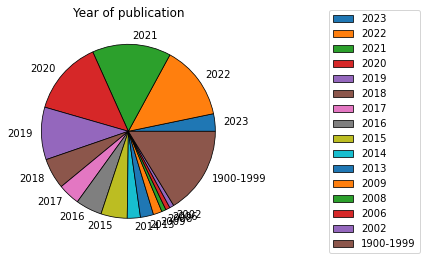

In [8]:
import matplotlib.pyplot as plt

coloridiversi = False # vogliamo i colori diversi? si/no
colors = plt.cm.tab20c(range(len(c)))  # Generate a range of colors from the 'tab20c' colormap
w = {"edgecolor":"k",'linewidth': 0.75, 'linestyle': 'solid', 'antialiased': True} # fette con bordi
toplot = 'Year' # attr da plottare

if coloridiversi:
    c.plot.pie(y=toplot, colors=colors, wedgeprops=w)
else:
    c.plot.pie(y=toplot, wedgeprops=w)
plt.title('Year of publication')
plt.legend(c.index, loc='center left', bbox_to_anchor=(1.4, 0.5)) # legenda spostata a dx
plt.ylabel('') # no scritta scomoda a sx
plt.show()

#### Divisione 2

3 gruppi: "tra 1900 e 1999", "tra 2000 e 2014", "altri"

In [9]:
# divisione nei 3 gruppi
y1900s = df[df['Year'] < '2000'].dropna()
y2000s = df[df['Year'] >= '2000'].dropna()
y2000 = y2000s[y2000s['Year'] < '2015'].dropna()
y2015 = y2000s[y2000s['Year'] >= '2015'].dropna()
# print(y1900s.index.size)
# print(y2000.index.size)
# print(y2015.index.size)

# conteggio articoli del 2015 (separatamente)
cont15 = y2015['Year'].value_counts()
cont = pd.DataFrame(cont15)
cont = cont.reset_index()
cont['index'] = cont['index'].astype('int')
cont = cont.sort_values(by=['index'], ascending=False)

# conteggio anno per anno + conteggio 1900s + conteggio 2000s
new1900 = ['1900-1999', y1900s.index.size]
new2000 = ['2000-2014', y2000.index.size]
cont = cont.append(pd.Series(new2000, index=cont.columns[:len(new)]), ignore_index=True)
cont = cont.append(pd.Series(new1900, index=cont.columns[:len(new)]), ignore_index=True)
cont = cont.set_index('index') # rimetto anno come index

print(cont)

           Year
index          
2023          4
2022         17
2021         18
2020         17
2019         12
2018          7
2017          5
2016          6
2015          6
2000-2014    11
1900-1999    20


In [10]:
# fare pre e post 2018 (fuori e dentro al survey)

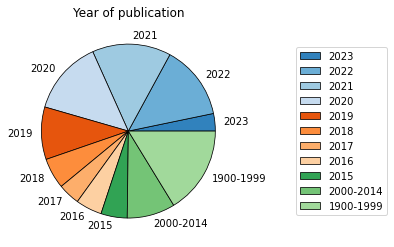

In [11]:
import matplotlib.pyplot as plt

coloridiversi = True # vogliamo i colori diversi? si/no
rdCol = False # due possibili tavolozze per i nuovi colori
if rdCol:  
    import matplotlib.colors as mcolors
    import random
    colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = cont.index.size)
else:
    from matplotlib import cm
    colors = plt.cm.tab20c(range(len(c)))

w = {"edgecolor":"k",'linewidth': 0.75, 'linestyle': 'solid', 'antialiased': True} # fette con bordi
toplot = 'Year' # attr da plottare
if coloridiversi:
    cont.plot.pie(y=toplot, colors=colors, wedgeprops=w)
else:
    cont.plot.pie(y=toplot, wedgeprops=w)
plt.title('Year of publication')
plt.axes().set_ylabel('')
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))
plt.show()

# Statistiche

In [12]:
print("Articoli totali:\t", df.index.size)
print()
print("Articoli fino al 1999:\t", y1900s.index.size, '\tossia\t', str(round((y1900s.index.size / df.index.size)*100, 3)) + '%')
print("Articoli dal 2000:\t", y2000s.index.size, '\tossia\t', str(round((y2000s.index.size / df.index.size)*100, 3)) + '%')
print(" Di cui:")
print("  Art. dal 00 al 14:\t", y2000.index.size, '\tossia\t', str(round((y2000.index.size / df.index.size)*100, 3)) + '%')
print("  Art. dal 15 al 23:\t", y2015.index.size, '\tossia\t', str(round((y2015.index.size / df.index.size)*100, 3)) + '%')

print('\nPercentuali calcolate rispetto al totale (' + str(df.index.size) + ')')
a="""print()
# percentuali
print("Articoli fino al 1999:", str(round((y1900s.index.size / df.index.size)*100, 3)) + '%')
print("Articoli dal 2000:", str(round((y2000s.index.size / df.index.size)*100, 3)) + '%')
print()
print("Articoli dal 2000 al 2014:", str(round((y2000.index.size / df.index.size)*100, 3)) + '%')
print("Articoli dal 2015 a oggi:", str(round((y2015.index.size / df.index.size)*100, 3)) + '%')
"""

Articoli totali:	 123

Articoli fino al 1999:	 20 	ossia	 16.26%
Articoli dal 2000:	 103 	ossia	 83.74%
 Di cui:
  Art. dal 00 al 14:	 11 	ossia	 8.943%
  Art. dal 15 al 23:	 92 	ossia	 74.797%

Percentuali calcolate rispetto al totale (123)


## Conteggi vari

In [13]:
# paper che vengono da arxiv
arxiv = max(sum(df['Url'].str.contains('arxiv.org')), sum(df['Doi'].str.contains('ARXIV')))
arxiv
# NOTA: ci son troppi NA => conteggio non preciso

22

In [14]:
# print(df['Year'].to_string()) # print di tutta la colonna 

In [15]:
journals = df['Title'].value_counts()
journals

Bert: Pre-training of deep bidirectional transformers for language understanding            2
Green {AI}                                                                                  2
On {Computable} {Numbers}, with an {Application} to the {Entscheidungsproblem}              1
A survey on green deep learning                                                             1
Revealing the dark secrets of BERT                                                          1
                                                                                           ..
Exploring the limits of transfer learning with a unified text-to-text transformer           1
XLNet: Generalized Autoregressive Pretraining for Language Understanding                    1
Natural language processing: History, evolution, application, and future work               1
Conceptual Dependency Theory                                                                1
The role of artificial intelligence in achieving the {Sustai

#### Divisione 3

2 gruppi: "tra 1900 e 2017", "altri"

           Year
index          
2023          4
2022         17
2021         18
2020         17
2019         12
2018          7
1900-2017    48


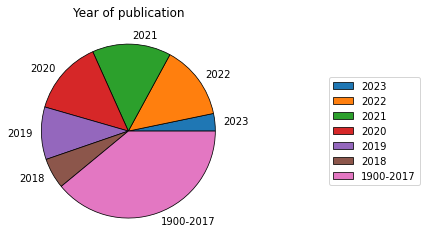

In [16]:
### Codice per dividere in 2 gruppi
# Cambiare solo il valore di year e coloridiversi, il resto è automatico

import matplotlib.pyplot as plt

## Settings
year = '2018' # verranno raggruppati i papers da 1900 a year-1
coloridiversi = False  # vogliamo colori diversi nel grafico? True/False; 
# Serve per quando ci son troppe fette nella pie chart e quindi vengono ripetuti i colori (con True si evita)

## Codice vero e proprio
# articoli del primo gruppo (dal 1900 al 'year-1')
cl1 = df[df['Year'] < year].dropna()
# articoli del secondo gruppo (dal 'year' a oggi)
cl2 = df[df['Year'] >= year].dropna()

# conteggio articoli del secondo gruppo (uno per uno)
conteggio = cl2['Year'].value_counts()
c = pd.DataFrame(conteggio)
c = c.reset_index()
# sort (per output formattato meglio)
c['index'] = c['index'].astype('int')
c = c.sort_values(by=['index'], ascending=False)
# conteggio anno per anno + conteggio primo gruppo (tot)
new = ['1900-'+str(int(year)-1), cl1.index.size]
c = c.append(pd.Series(new, index=c.columns[:len(new)]), ignore_index=True)
c = c.set_index('index') # rimetto anno come index
# in questo modo sono ordinati dal più recente al meno (meno = quelli del novecento)
print(c)

colors = plt.cm.tab20c(range(len(c)))  # Generate a range of colors from the 'tab20c' colormap
w = {"edgecolor":"k",'linewidth': 0.75, 'linestyle': 'solid', 'antialiased': True} # fette con bordi
toplot = 'Year' # attr da plottare

if coloridiversi:
    c.plot.pie(y=toplot, colors=colors, wedgeprops=w)
else:
    c.plot.pie(y=toplot, wedgeprops=w)
plt.title('Year of publication')
plt.legend(c.index, loc='center left', bbox_to_anchor=(1.4, 0.5)) # legenda spostata a dx
plt.ylabel('') # no scritta scomoda a sx
plt.show()

# numero citazioni di ogni articolo = peso

In [17]:
import requests
from time import sleep

def get_citation_count(paper_title, paper_year):
    query = f"https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q={paper_title}&as_ylo={paper_year}"
    response = requests.get(query)
    response.text.lower # no case sensitive
    start_index = response.text.find('Cited by') + len('Cited by')
    end_index = response.text.find('</a>', start_index)
    citation_count = response.text[start_index:end_index].strip()
    sleep(40)  # no blocco web scraping google scholar. 
    return citation_count

paper_title = "Attention is all you need" # .lower() per trovare tutti i paper dati in input
paper_year = "2017"

citation_count = get_citation_count(paper_title, paper_year)
print(f"Citations: {citation_count}")

Citations: PE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta name="viewport" content="initial-scale=1"><title>https://scholar.google.com/scholar?hl=en&amp;as_sdt=0%2C5&amp;q=Attention%20is%20all%20you%20need&amp;as_ylo=2017</title></head>
<body style="font-family: arial, sans-serif; background-color: #fff; color: #000; padding:20px; font-size:18px; overscroll-behavior:contain;" onload="e=document.getElementById('captcha');if(e){e.focus();} if(solveSimpleChallenge) {solveSimpleChallenge(,);}">
<div style="max-width:400px;">
<hr noshade size="1" style="color:#ccc; background-color:#ccc;"><br>
<div style="font-size:13px;">
Our systems have detected unusual traffic from your computer network.  Please try your request again later.  <a href="#" onclick="document.getElementById('infoDiv0').style.display='block';">Why did this happen?


In [18]:
# RIMUOVERE { E } + lowercase
dd = df.copy()
# dd
dd["Title"] = dd["Title"].str.replace("{","")
dd["Title"] = dd["Title"].str.replace("}","")
dd["Title"] = dd["Title"].str.lower()  # lowercase, non case sensitive.
               
dd['Title']                                          

0                   first draft of a report on the edvac
1      mmpu—a real processing-in-memory architecture ...
2                                               green ai
3                                               green ai
4      energy and policy considerations for deep lear...
                             ...                        
118    energyvis: interactively tracking and explorin...
119                      a systematic review of green ai
120    an empirical study of practitioners' perspecti...
121    data-centric green ai an exploratory empirical...
122    the role of artificial intelligence in achievi...
Name: Title, Length: 123, dtype: object

In [ ]:
# ATTENZIONE: blocca
# dd['Citations'] = dd.apply(lambda row: get_citation_count(row['Title'], row['Year']), axis=1)
# dd['Citations'].head()